In [6]:
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt

In [7]:
vol = sitk.ReadImage(
    "/mnt/slowdata/cadaveric-full-arm/S221830/S221830.nrrd", imageIO="NrrdImageIO"
)
vol = sitk.Cast(vol, sitk.sitkFloat32)
vol = sitk.Clamp(vol, sitk.sitkFloat32, -1024, 3000)
vol = sitk.RescaleIntensity(vol, 0, 1)

In [8]:
# The spatial definition of the images we want to use in a deep learning framework (smaller than the original).
new_size = [640, 640, vol.GetDepth()]
reference_image = sitk.Image(new_size, vol.GetPixelIDValue())
reference_image.SetOrigin(vol.GetOrigin())
reference_image.SetDirection(vol.GetDirection())
reference_image.SetSpacing(
    [sz * spc / nsz for nsz, sz, spc in zip(new_size, vol.GetSize(), vol.GetSpacing())]
)
new_vol = sitk.Resample(vol, reference_image)

sitk.RegionOfInterest()

In [13]:
new_vol.GetWidth()

640

In [ ]:
vol.GetDepth

(640, 640)
-1.3028144e-18 0.44955269


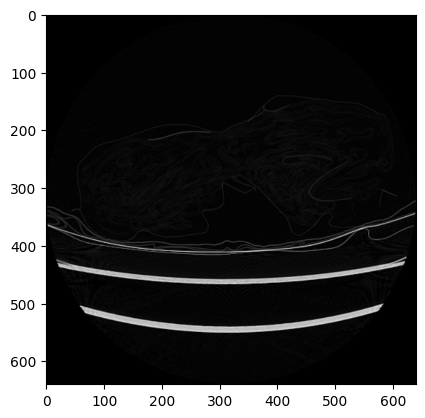

(640, 640)
0.0 0.81774354


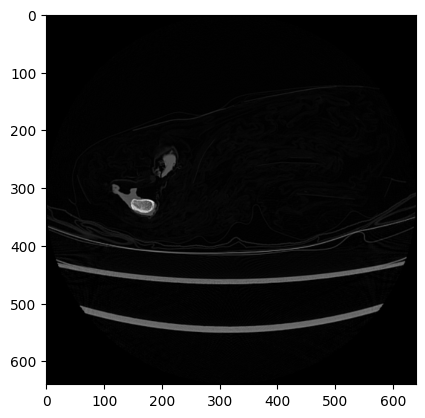

(640, 640)
0.0 0.74602383


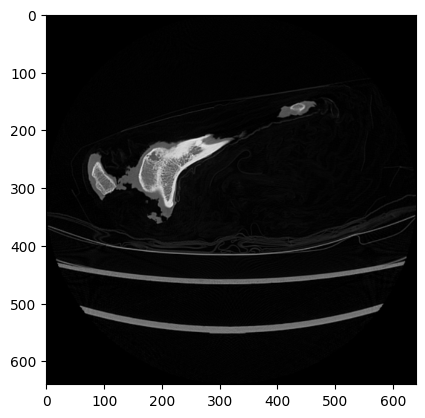

(640, 640)
0.0 0.7781511


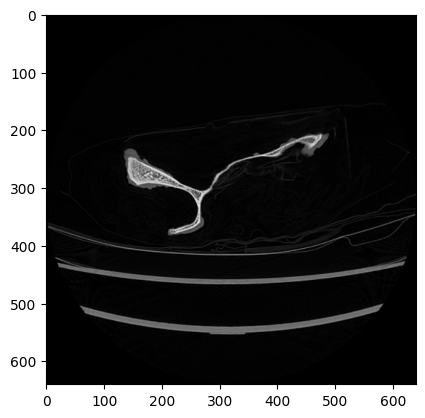

(640, 640)
0.0 0.48484096


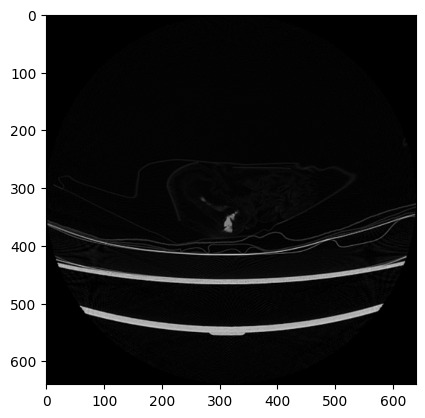

(640, 640)
0.0 0.49865806


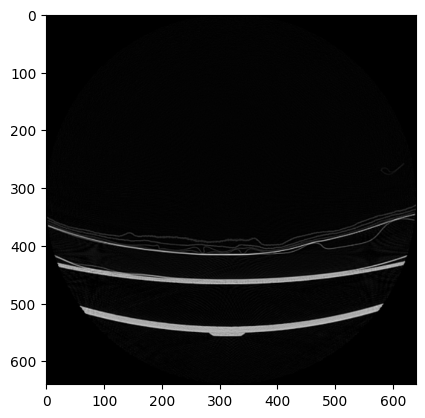

(640, 640)
0.0 0.5028827


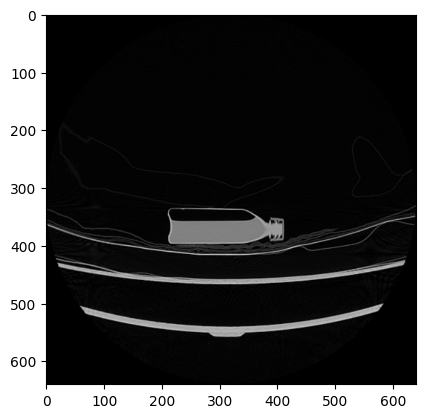

: 

In [16]:
for i in range(new_vol.GetSize()[-1]):
    if i % 100 == 0:
        slice = new_vol[:, :, i]
        slice = sitk.GetArrayViewFromImage(slice)
        print(slice.shape)
        print(np.min(slice), np.max(slice))

        plt.imshow(slice, cmap="gray")
        plt.show()

In [7]:
# # iterate over all slices
# slices = []
# for i in range(vol.GetSize()[-1]):
#     slice = vol[:, :, i]
#     # resize each slice to (640,640)
#     slice = sitk.Resample(
#         slice,
#         [640, 640]
#     )
#     # convert to numpy
#     slice = sitk.GetArrayFromImage(slice)
#     slices.append(slice)

In [15]:
for s in slices:
    print(s.shape)
    print(np.min(s), np.max(s))
    plt.imshow(s, cmap="gray")
    plt.show()
    break

NameError: name 'slices' is not defined